<a href="https://colab.research.google.com/github/crzysab/Projek-DQLab/blob/main/Customer_Segmentation_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kmodes

In [8]:
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import pickle  

In [3]:
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')

In [4]:
df_model.head()

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,1.411245,0.946763
1,1,2,0,-1.617768,-1.695081
2,0,3,0,0.722833,-0.695414
3,0,3,0,1.067039,-0.727361
4,1,4,0,0.240944,1.382421


In [5]:
# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes(n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost[k]= kproto.cost_  

In [6]:
cost

{2: 74.98549593602971,
 3: 50.69623251767927,
 4: 34.548333548311994,
 5: 26.54795154702333,
 6: 23.58583811625583,
 7: 21.406015399274025,
 8: 18.800557366379174,
 9: 16.787634878288536}

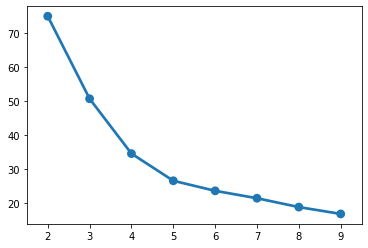

In [7]:
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

Elbow plot ini dapat dibuat dengan cara memvisualisasikan total jarak seluruh data kita ke pusat cluster-nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.

Dari hasil tersebut, kamu dapat mengetahui titik siku dari plot tersebut adalah pada saat k = 5. Sehingga kamu memutuskan untuk menggunakan 5 sebagai jumlah cluster optimalnya.

**Membuat Model**

Pembuatan model dengan jumlah kluster yang sudah didapat pada tahap sebelumnya yaitu 5 dan menyimpan hasilnya sebagai pickle file.

In [9]:
kproto = KPrototypes(n_clusters = 5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

In [10]:
#Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb')) 

In [11]:
# Menentukan segmen tiap pelanggan    
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('segmen pelanggan: {}\n'.format(clusters))    

segmen pelanggan: [1 0 2 2 3 4 1 2 4 4 2 2 1 1 3 4 4 2 3 0 3 2 4 3 3 2 3 4 2 2 0 1 0 3 4 3 4
 1 4 0 4 3 4 3 4 3 2 1 4 1]



In [13]:
# Menggabungkan data awal dan segmen pelanggan    
df_final = df_model.copy()    
df_final['cluster'] = clusters
print(df_final.head()) 

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun  cluster
0              0        4             1  1.411245             0.946763        1
1              1        2             0 -1.617768            -1.695081        0
2              0        3             0  0.722833            -0.695414        2
3              0        3             0  1.067039            -0.727361        2
4              1        4             0  0.240944             1.382421        3
